In [1]:
%matplotlib inline

import pandas as pd
from datetime import datetime 
from matplotlib.ticker import FuncFormatter

pd.options.mode.chained_assignment = None

def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)

money_formatter = FuncFormatter(money)

In [2]:

def backtest(sp500):
    'Backtest a dataset using the SMA strategy'
    initial_value = 100
    
    sp500['Criteria'] = sp500['Adj Close'] >= sp500['SMA 365']  
    sp500['Buy & Hold'] = initial_value * (1 + sp500['Pct Change']).cumprod()
    sp500['Trend'] = initial_value * (1 + ( sp500['Criteria'].shift(1) * sp500['Pct Change'] )).cumprod() 
    
    sp500 = sp500.dropna()
    start = sp500.index.min()
    end = sp500.index.max()
    
    # Plot graph
    ax = sp500[['Trend', 'Buy & Hold']].plot(grid=True, kind='line', title="Trend (12 month SMA) vs. Buy & Hold\n{} -  {}".format(start.year, end.year), logy=True, figsize=(12, 6))
    ax.yaxis.set_major_formatter(money_formatter)

    # Print end stats
    portfolio_value = sp500.iloc[-1]['Trend']
    benchmark_value = sp500.iloc[-1]['Buy & Hold']
    years = ((end.year - start.year - 2) * 12 + end.month - 1 + (13-start.month) ) / 12.00
    portfolio_return = (((portfolio_value / 100.00) ** (1.00/years)) - 1) * 100.00
    benchmark_return = (((benchmark_value / 100.00) ** (1.00/years)) - 1) * 100.00
    
    text = 'Portfolio value: ${:,.0f} ({:,.2f}%)'.format(portfolio_value, portfolio_return)
    text += "\n" + 'Benchmark value: ${:,.0f} ({:,.2f}%)'.format(benchmark_value, benchmark_return)
    ax.text(0.98, 0.04, text,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12)

    return

In [3]:
sp500 = pd.read_csv('data/SP500.csv', sep=',', parse_dates=True, index_col='Date', usecols=['Adj Close', 'Date'])
sp500.head()

,Adj Close
Date,
1960-01-04,59.910000
1960-01-05,60.389999
1960-01-06,60.130001
1960-01-07,59.689999
1960-01-08,59.500000


In [4]:
sp500['Pct Change'] = sp500['Adj Close'].pct_change()
sp500['SMA 365'] = sp500['Adj Close'].rolling(window=365).mean()
sp500.dropna().head()

,Adj Close,Pct Change,SMA 365
Date,,,
1961-06-14,65.980003,0.002736,58.350521
1961-06-15,65.690002,-0.004395,58.366356
1961-06-16,65.180000,-0.007764,58.379479
1961-06-19,64.580002,-0.009205,58.391671
1961-06-20,65.150002,0.008826,58.406630


In [5]:
sp500['Criteria'] = sp500['Adj Close'] >= sp500['SMA 365']  
sp500['Criteria'].value_counts()

True     10577
False     4032
Name: Criteria, dtype: int64

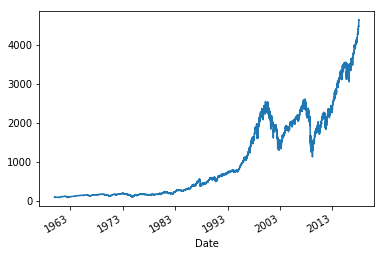

In [6]:
(100 * (1 + sp500['Pct Change']).cumprod()).plot()

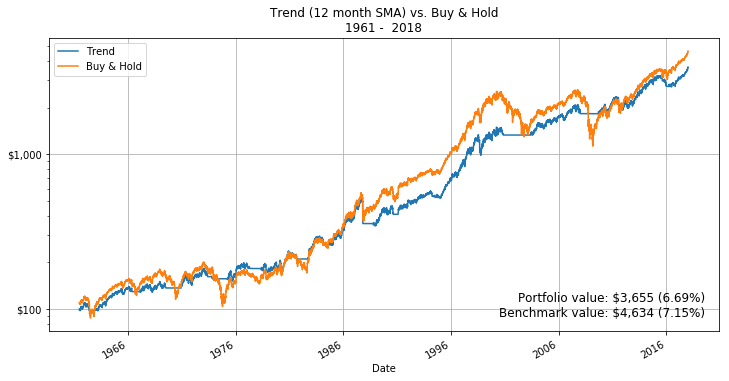

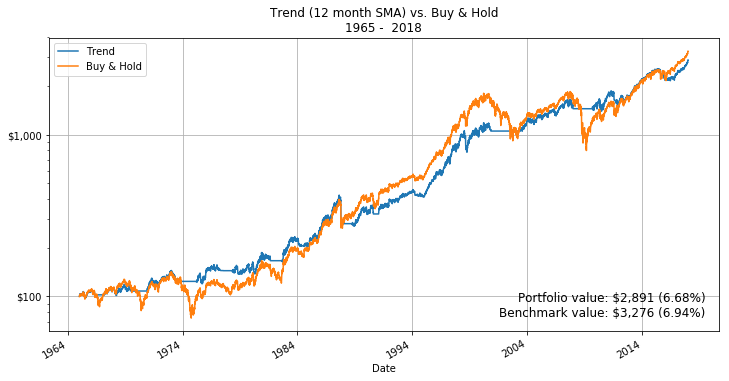

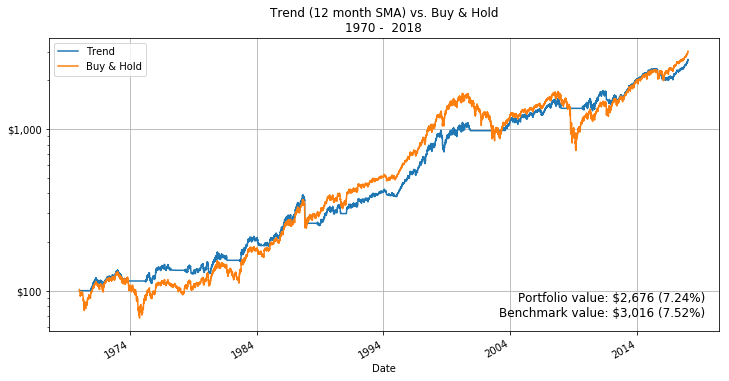

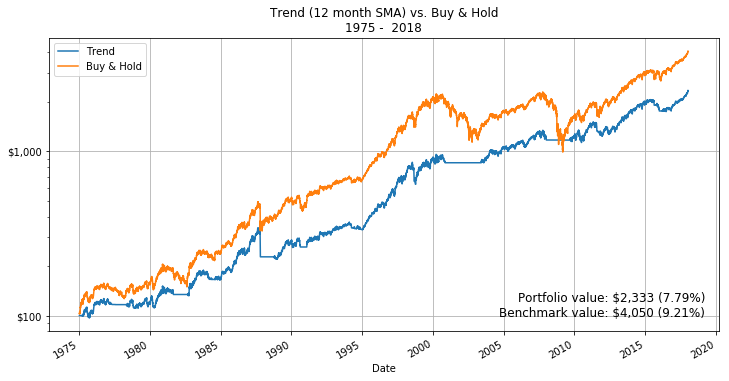

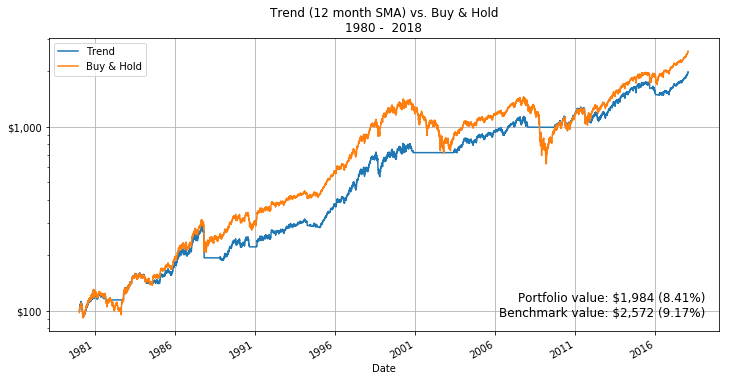

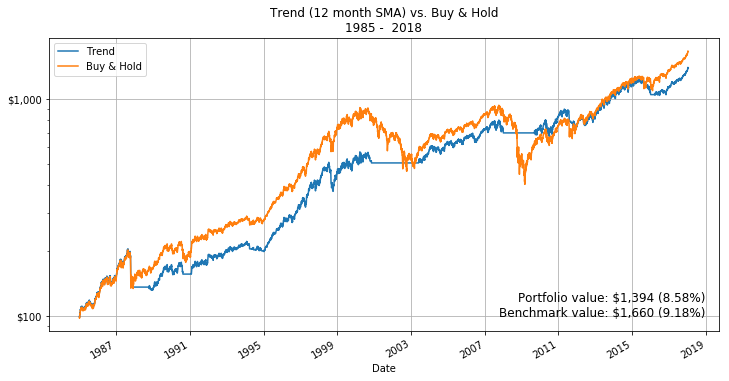

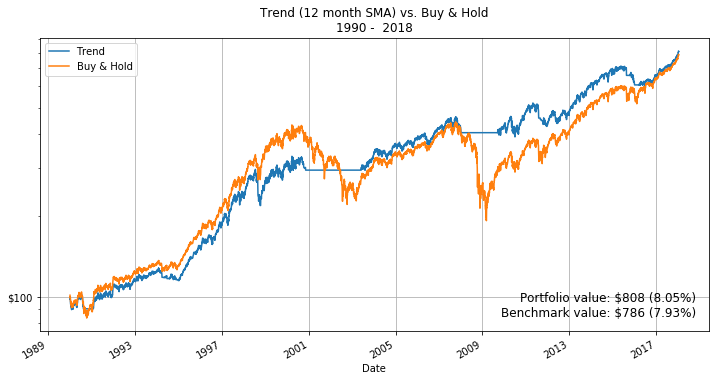

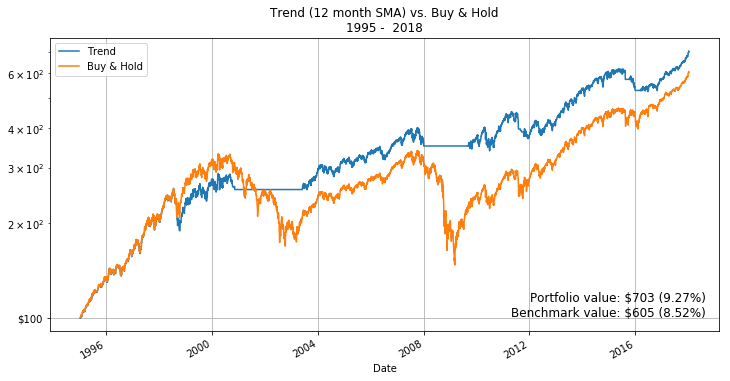

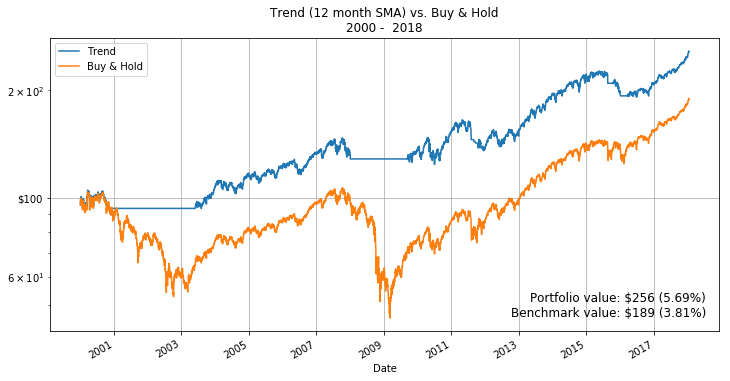

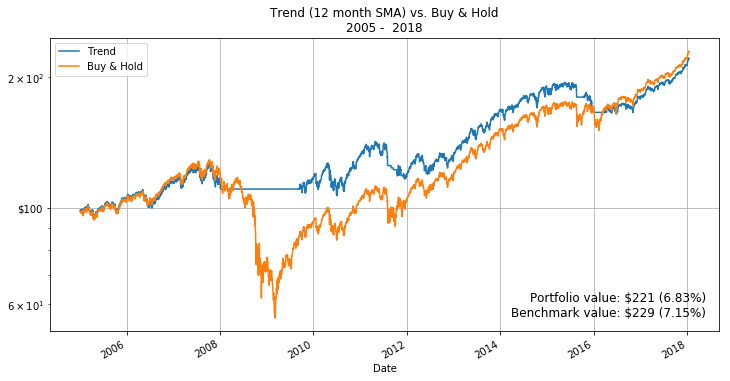

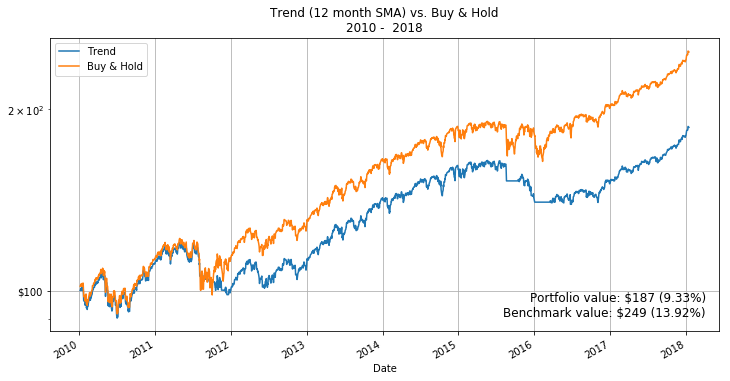

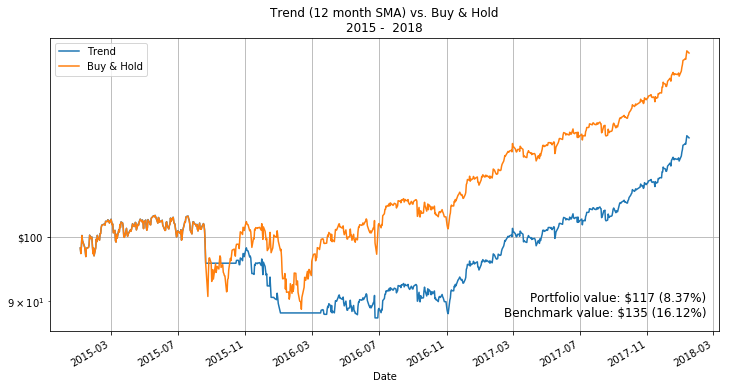

In [7]:
year = 1960
while(year <= 2018):
    backtest(sp500[datetime(year, 1, 1):])
    year += 5